# TP: Machine Learning

## TP3: Clustering


In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine learning/TP/Life_Expectancy_Data.csv")
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Longitude                        2938 non-null   float64
 2   Latitude                         2938 non-null   float64
 3   Continent                        2938 non-null   object 
 4   Year                             2938 non-null   int64  
 5   Status                           2938 non-null   object 
 6   Life_expectancy                  2928 non-null   float64
 7   Adult_mortality                  2928 non-null   float64
 8   Infant_deaths                    2938 non-null   int64  
 9   Alcohol                          2744 non-null   float64
 10  Percentage_expenditure           2938 non-null   float64
 11  Hepatitis_B                      2385 non-null   float64
 12  Measles             

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

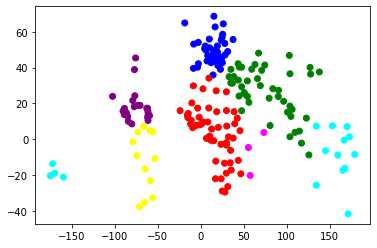

In [ ]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt


Identify each class with the plot colors.

red : africa

green : asia

blue : europa

purple : North America

yellow : South America

magenta : Seven seas

cyan : Oceania

What do the coordinates correspond to?

x axis corespond to Longitude

y axis correspond to Latitude

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

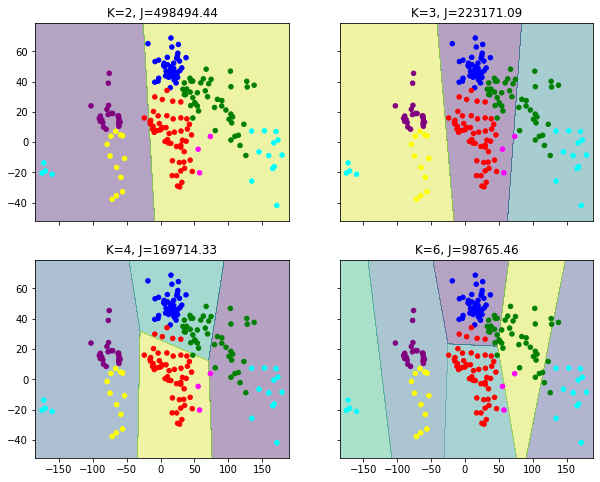

In [ ]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_,
                         "K=4, J=%.2f" % km4.inertia_,
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt


Inertia compute the sum of squared distances of samples to their closest cluster center. More the inertia is close to 0 more the cluster is good.

The mean squared error (MSE) is another metric which can be fit better.

Which is the main problem with the mercator representation for continent detection?

## STEP 2: Spatial dataset normalization



Displace the origin of longitude to 30° east.

In [ ]:
np_norm30 = np.array(np1, dtype = float)
np_norm30[:,0] -= 30
np_norm30[np_norm30[:,0]<-180,0] += 360



This normalisation allows to gather oceania class.



Apply KMeans to the new normalized dataset.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

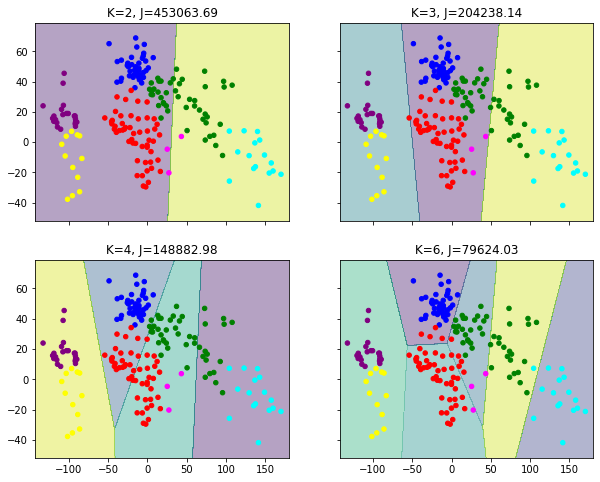

In [ ]:
x_min, x_max = np_norm30[:, 0].min() - 10, np_norm30[:, 0].max() + 10
y_min, y_max = np_norm30[:, 1].min() - 10, np_norm30[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np_norm30)
km3 = cluster.KMeans(n_clusters=3).fit(np_norm30)
km4 = cluster.KMeans(n_clusters=4).fit(np_norm30)
km6 = cluster.KMeans(n_clusters=6).fit(np_norm30)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_,
                         "K=4, J=%.2f" % km4.inertia_,
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_norm30[:, 0], np_norm30[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a sklearn function:

```
sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
```

With:

**n_components** int, default=1

The number of mixture components.

**covariance_type** {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’

String describing the type of covariance parameters to use. Must be one of:

full: each component has its own general covariance matrix

tied: all components share the same general covariance matrix

diag: each component has its own diagonal covariance matrix

spherical: each component has its own single variance

**tol** float, default=1e-3

The convergence threshold. EM iterations will stop when the lower bound average gain is below this threshold.

**reg_covar** float, default=1e-6

Non-negative regularization added to the diagonal of covariance. Allows to assure that the covariance matrices are all positive.

**max_iter** int, default=100

The number of EM iterations to perform.

**n_init** int, default=1

The number of initializations to perform. The best results are kept.

**init_params** {‘kmeans’, ‘random’}, default=’kmeans’

The method used to initialize the weights, the means and the precisions. Must be one of:

kmeans: responsibilities are initialized using kmeans.

random: responsibilities are initialized randomly.

**weights_init** array-like of shape (n_components, ), default=None

The user-provided initial weights. If it is None, weights are initialized using the init_params method.

**means_init** array-like of shape (n_components, n_features), default=None

The user-provided initial means, If it is None, means are initialized using the init_params method.

**precisions_init** array-like, default=None

The user-provided initial precisions (inverse of the covariance matrices). If it is None, precisions are initialized using the ‘init_params’ method. The shape depends on ‘covariance_type’:

    (n_components,)                        if 'spherical',
    (n_features, n_features)               if 'tied',
    (n_components, n_features)             if 'diag',
    (n_components, n_features, n_features) if 'full'

**random_state** int, RandomState instance or None, default=None

Controls the random seed given to the method chosen to initialize the parameters (see init_params). In addition, it controls the generation of random samples from the fitted distribution (see the method sample). Pass an int for reproducible output across multiple function calls. See Glossary.

**warm_start** bool, default=False

If ‘warm_start’ is True, the solution of the last fitting is used as initialization for the next call of fit(). This can speed up convergence when fit is called several times on similar problems. In that case, ‘n_init’ is ignored and only a single initialization occurs upon the first call. See the Glossary.



Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random init for 2, 3, 4 and 6 components

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

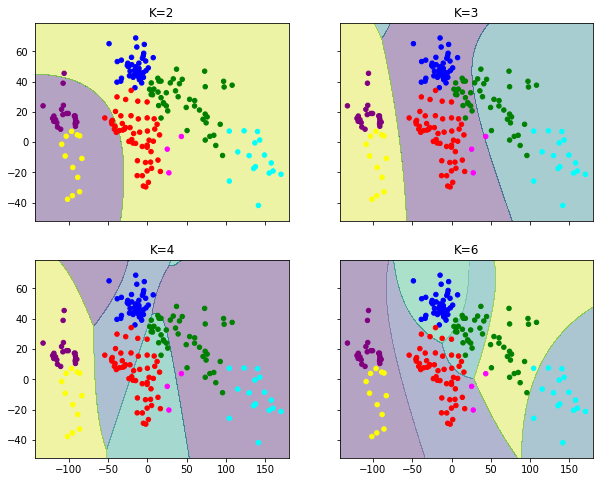

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
Gaus2 = GaussianMixture(n_components = 2).fit(np_norm30)
Gaus3 = GaussianMixture(n_components = 3).fit(np_norm30)
Gaus4 = GaussianMixture(n_components = 4).fit(np_norm30)
Gaus5 = GaussianMixture(n_components = 6).fit(np_norm30)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [Gaus2, Gaus3, Gaus4, Gaus5],
                        ["K=2",
                         "K=3",
                         "K=4",
                         "K=6"]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_norm30[:, 0], np_norm30[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

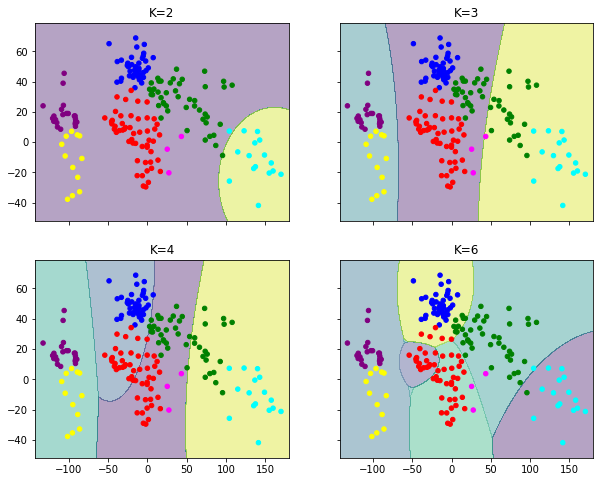

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
Gaus2 = GaussianMixture(n_components = 2, covariance_type='diag').fit(np_norm30)
Gaus3 = GaussianMixture(n_components = 3, covariance_type='diag').fit(np_norm30)
Gaus4 = GaussianMixture(n_components = 4, covariance_type='diag').fit(np_norm30)
Gaus5 = GaussianMixture(n_components = 6, covariance_type='diag').fit(np_norm30)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [Gaus2, Gaus3, Gaus4, Gaus5],
                        ["K=2",
                         "K=3",
                         "K=4",
                         "K=6"]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_norm30[:, 0], np_norm30[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

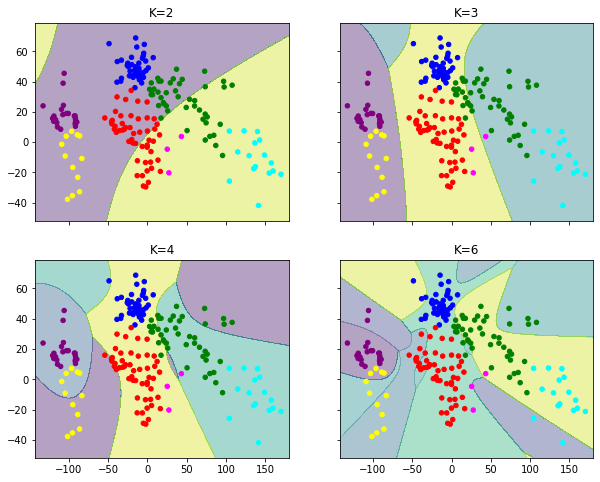

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
Gaus2 = GaussianMixture(n_components = 2, init_params='random').fit(np_norm30)
Gaus3 = GaussianMixture(n_components = 3, init_params='random').fit(np_norm30)
Gaus4 = GaussianMixture(n_components = 4, init_params='random').fit(np_norm30)
Gaus5 = GaussianMixture(n_components = 6, init_params='random').fit(np_norm30)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [Gaus2, Gaus3, Gaus4, Gaus5],
                        ["K=2",
                         "K=3",
                         "K=4",
                         "K=6"]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_norm30[:, 0], np_norm30[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt


>Which is the best method to detect continents?

GMM with diagonal covariance matrix for 6 components is the best visualy

>For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?

For this method, the probability to find country is low (close to 0) in the coordinates [-50, -40] because this point is far to the cluster.


Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

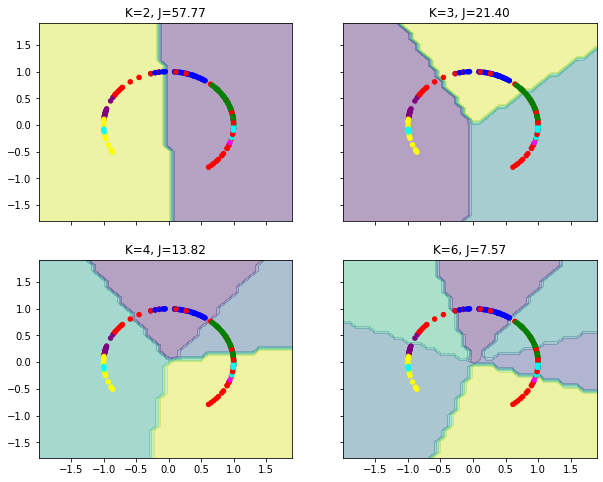

In [ ]:
length = np.sqrt((np1**2).sum(axis=1))[:,None]
X = np1 / length

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)
km6 = cluster.KMeans(n_clusters=6).fit(X)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_,
                         "K=4, J=%.2f" % km4.inertia_,
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

## STEP 3: Detection of caribbean island

Isolate the North and South American continents.

In [ ]:
df_isolate = df_Status[(df_Status.Continent == 'North America') | (df_Status.Continent == 'South America')]
df_Y_isolate = df_isolate.replace(['North America', 'South America'], [0, 1])
np_Y_isolate = df_Y_isolate.to_numpy()

In [ ]:
df_X_isolate = df1[(df_Status.Continent == 'North America') | (df_Status.Continent == 'South America')].loc[:,['Longitude', 'Latitude']]
np1_isolate = df_X_isolate.to_numpy()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

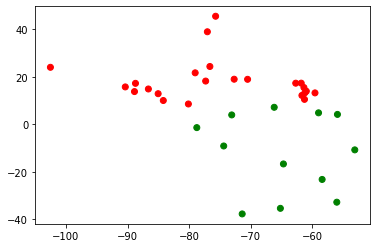

In [ ]:
np_Y_isolate = np_Y_isolate.reshape((np_Y_isolate.shape[0],))

plt.scatter(np1_isolate[:,0], np1_isolate[:,1], c=np_Y_isolate, cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

Propose a methodology to create a cluster including caribbean independent nations.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

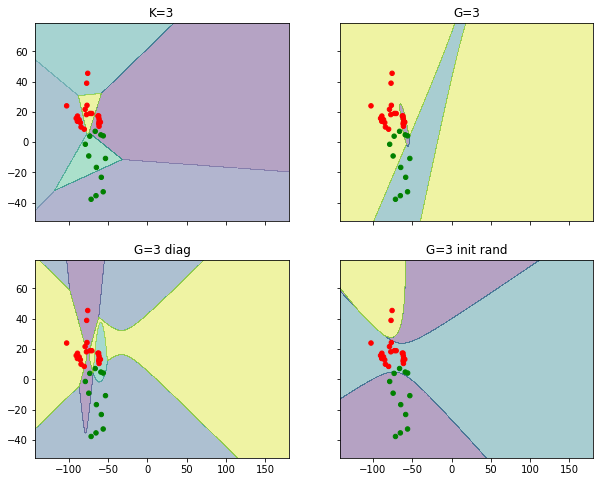

In [ ]:
K2 = cluster.KMeans(n_clusters=6).fit(np1_isolate)
Gaus2 = GaussianMixture(n_components = 3).fit(np1_isolate)
Gaus3 = GaussianMixture(n_components = 4, covariance_type='diag').fit(np1_isolate)
Gaus4 = GaussianMixture(n_components = 3, init_params='random').fit(np1_isolate)


f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [K2, Gaus2, Gaus3, Gaus4],
                        ["K=3",
                         "G=3",
                         "G=3 diag",
                         "G=3 init rand"]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_isolate[:, 0], np1_isolate[:, 1], c=np_Y_isolate,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

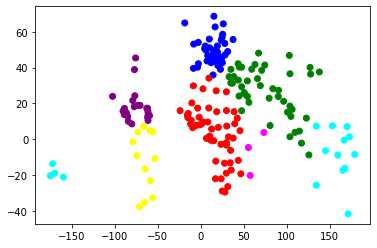

In [ ]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()

In [ ]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5605235331341647


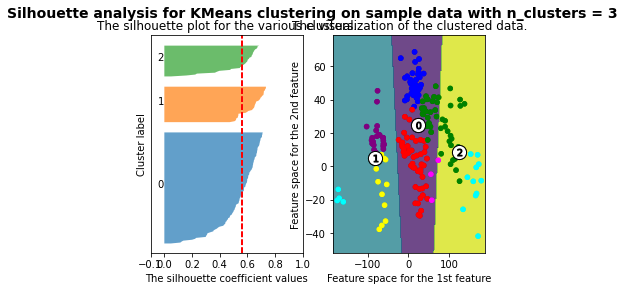

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Apply the previous code for different values of K (2,3,4 and 6).

In [ ]:
def metrics(K):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax2.contourf(xx, yy, Z, alpha=0.4)
        ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                    s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

        # Labeling the clusters
        centers = km.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % K,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5305313156410375


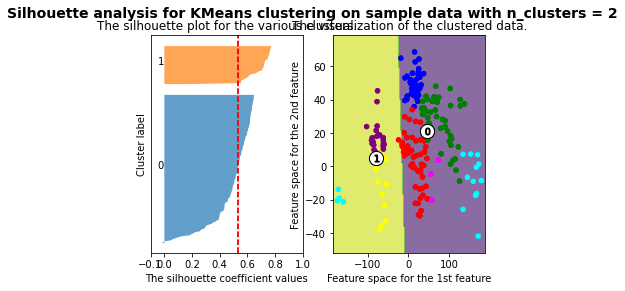

In [ ]:
metrics(2)

For n_clusters = 4 The average silhouette_score is : 0.47203675016384916


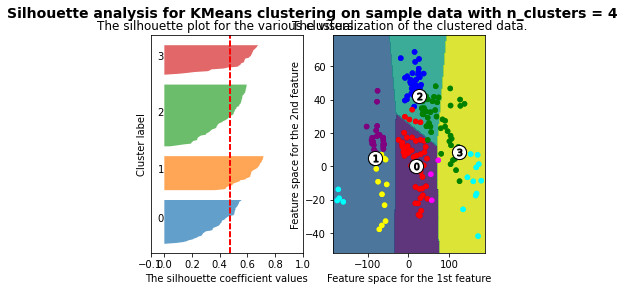

In [ ]:
metrics(4)

For n_clusters = 6 The average silhouette_score is : 0.4923958038899761


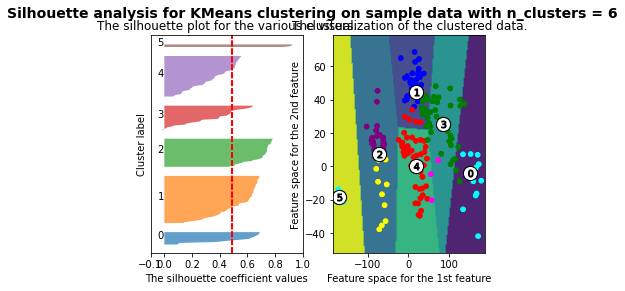

In [ ]:
metrics(6)


>According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

According to the silhouette score and the silhouette analysis, the most relevant value of K is 6 because continent class is better separated

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

In [ ]:
def metrics_Gaussien(K, diag = False, init = False):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    if diag:
        km = GaussianMixture(n_components=K, covariance_type='diag')
        cluster_labels = km.fit_predict(np1)
    elif init:
        km = GaussianMixture(n_components=K, init_params='random')
        cluster_labels = km.fit_predict(np1)
    else:
        km = GaussianMixture(n_components=K)
        cluster_labels = km.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax2.contourf(xx, yy, Z, alpha=0.4)
        ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                    s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))


        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % K,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.25679304492828603


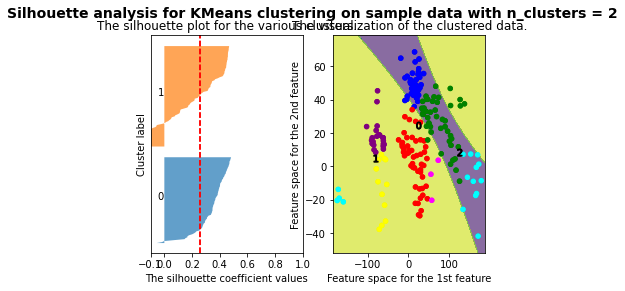

For n_clusters = 3 The average silhouette_score is : 0.5246036992008745


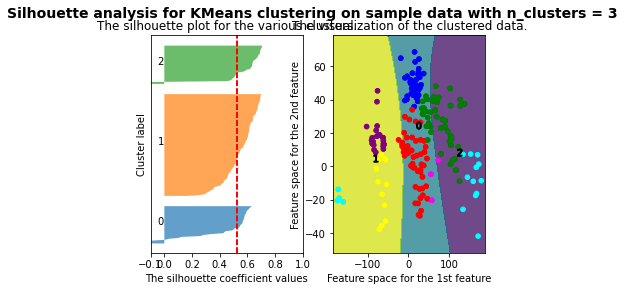

For n_clusters = 4 The average silhouette_score is : 0.4610735373159948


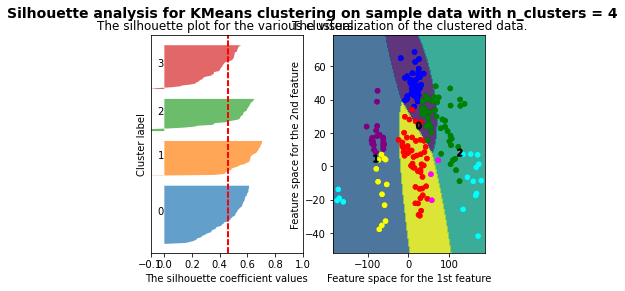

For n_clusters = 6 The average silhouette_score is : 0.4737214666983564


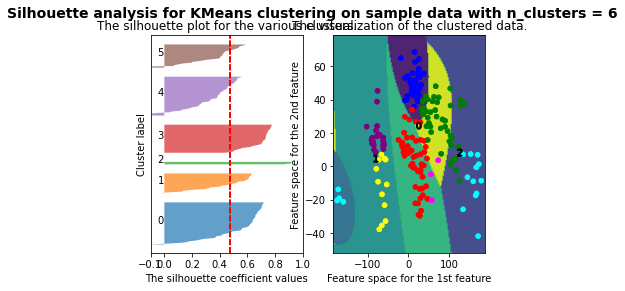

In [ ]:
metrics_Gaussien(2)
metrics_Gaussien(3)
metrics_Gaussien(4)
metrics_Gaussien(6)

For n_clusters = 2 The average silhouette_score is : 0.5177552977612189


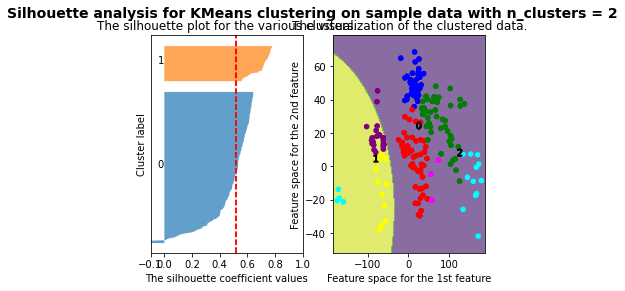

For n_clusters = 3 The average silhouette_score is : 0.5571837156046721


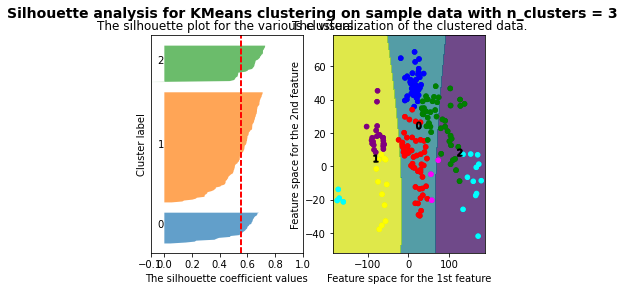

For n_clusters = 4 The average silhouette_score is : 0.49909388923938447


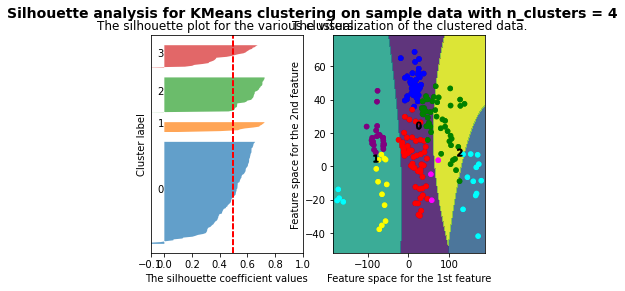

For n_clusters = 6 The average silhouette_score is : 0.4584956541973982


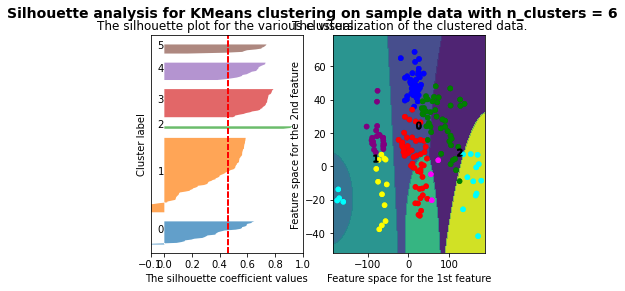

In [ ]:
metrics_Gaussien(2, diag=True)
metrics_Gaussien(3, diag=True)
metrics_Gaussien(4, diag=True)
metrics_Gaussien(6, diag=True)

For n_clusters = 2 The average silhouette_score is : 0.2812049574532017


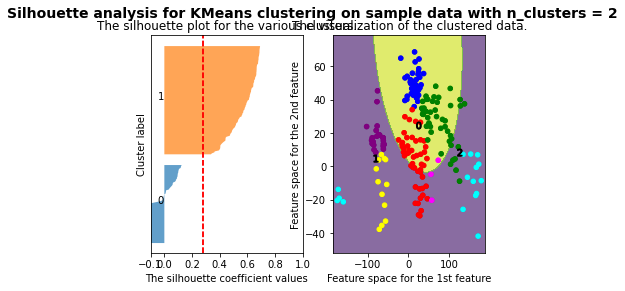

For n_clusters = 3 The average silhouette_score is : 0.1347558369383901


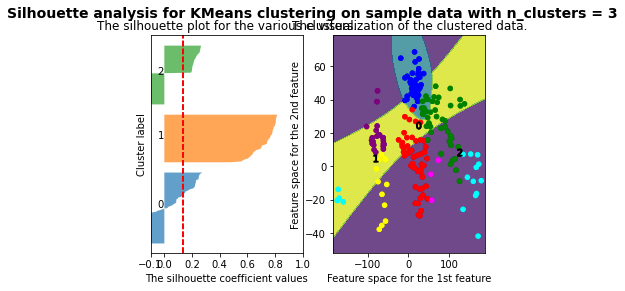

For n_clusters = 4 The average silhouette_score is : 0.37537571650922463


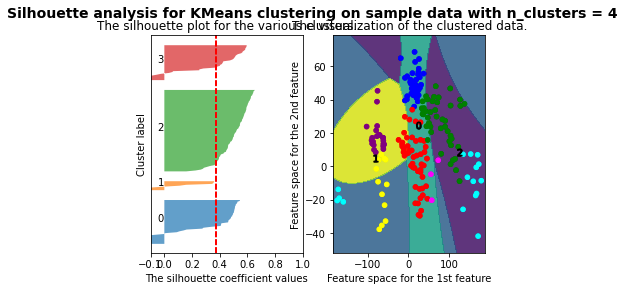

For n_clusters = 6 The average silhouette_score is : 0.42447748099993854


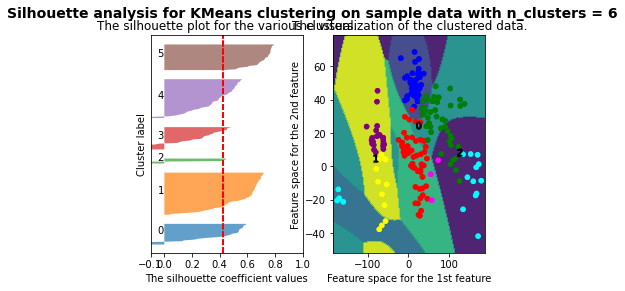

In [ ]:
metrics_Gaussien(2, init=True)
metrics_Gaussien(3, init=True)
metrics_Gaussien(4, init=True)
metrics_Gaussien(6, init=True)

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

In [ ]:
from sklearn.metrics import homogeneity_score

def metrics_homogenity(K, diag = False, init = False):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    if diag:
        km = GaussianMixture(n_components=K, covariance_type='diag')
        cluster_labels = km.fit_predict(np1)
    elif init:
        km = GaussianMixture(n_components=K, init_params='random')
        cluster_labels = km.fit_predict(np1)
    else:
        km = GaussianMixture(n_components=K)
        cluster_labels = km.fit_predict(np1)

    silhouette_avg = homogeneity_score(np_Y, cluster_labels)
    print("For n_clusters =", K, "The average homogenity score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax2.contourf(xx, yy, Z, alpha=0.4)
        ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                    s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))


        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % K,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average homogenity score is : 0.28786409903743576


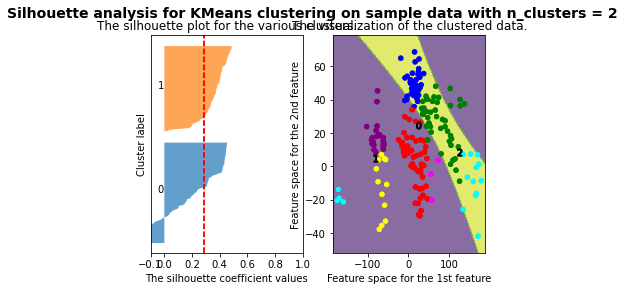

For n_clusters = 3 The average homogenity score is : 0.41003685401648193


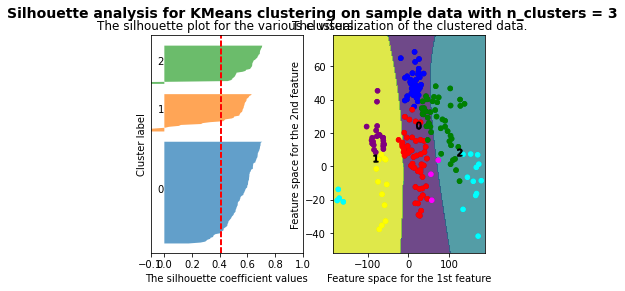

For n_clusters = 4 The average homogenity score is : 0.5401568045119125


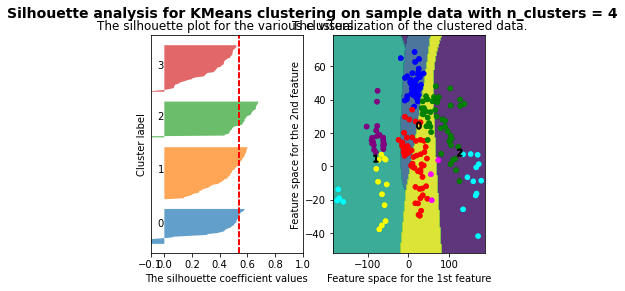

For n_clusters = 6 The average homogenity score is : 0.7203742444764968


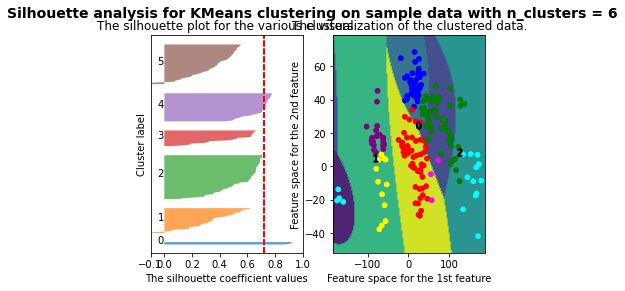

In [ ]:
metrics_homogenity(2)
metrics_homogenity(3)
metrics_homogenity(4)
metrics_homogenity(6)

>According to the homogeneity score, which is the most relevant value of K ?

According to the homogeneity score, the most relevant value of K is 6

## STEP 4: Alcoholism

The main goal is to develop a complete methodology to answer general questions.

**QUESTION 1**

>In the year 2000, which countries are heavily concerned by an Alcohol issue?

Zimbaboe is the countrie which is heavily concerned by an Alcohol issue

**QUESTION 2**

>In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

Schooling is the parameters linked with Alcoholism.

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2014? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?

**Q1 )**

In [ ]:
df_Alcohol = df[(df.Year == 2000)].loc[:,['Country','Alcohol']]
df_Alcohol.max()

Country    Zimbabwe
Alcohol       14.07
dtype: object

**Q2 )**

In [ ]:
df_Alcohol_link = df[(df.Year == 2000) | (df.Country == 'Zimbabwe')].corr()
print(df_Alcohol_link)

                                 Longitude  Latitude      Year  \
Longitude                         1.000000  0.013133  0.037839   
Latitude                          0.013133  1.000000 -0.344844   
Year                              0.037839 -0.344844  1.000000   
Life_expectancy                  -0.126346  0.526635 -0.261027   
Adult_mortality                   0.100613 -0.451807  0.340271   
Infant_deaths                     0.120857 -0.019905 -0.017983   
Alcohol                          -0.229434  0.273146  0.042466   
Percentage_expenditure           -0.029069  0.334527 -0.085006   
Hepatitis_B                      -0.124526  0.017178  0.030312   
Measles                           0.098686 -0.033618 -0.050082   
BMI                              -0.192682  0.351880 -0.131890   
Under-five_deaths                 0.115735 -0.029803 -0.016007   
Polio                             0.051714  0.321963  0.058960   
Total_expenditure                -0.222739  0.115602  0.056730   
Diphtheria

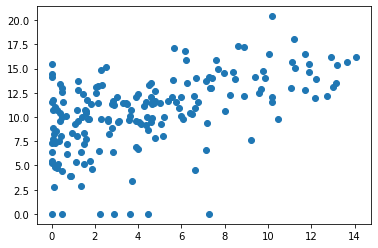

In [ ]:
plt.scatter(df[(df.Year == 2000) | (df.Country == 'Zimbabwe')].Alcohol.to_numpy(), df[(df.Year == 2000) | (df.Country == 'Zimbabwe')].Schooling.to_numpy())

**Q3 )**

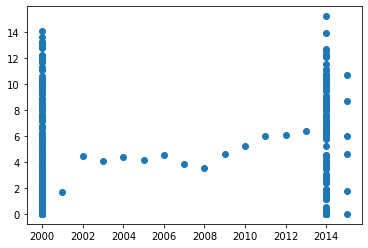

In [ ]:
df_trend = df[(df.Year <= 2000) | (df.Year >= 2014) | (df.Country == 'Zimbabwe')].Alcohol
np_trend = df_trend.to_numpy()

df_trend_Y = df[(df.Year <= 2000) | (df.Year >= 2014) | (df.Country == 'Zimbabwe')].Year
np_trend_Y = df_trend_Y.to_numpy()

plt.scatter(np_trend_Y, np_trend)